In [58]:
import pandas as pd
import os
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
all_files_address=file_directory_address='/Users/parker.bremer/coding_projects/bucketbase/data/individual_sample_data_subset/unzipped/BRYU005_Bacterial_Supernatant'

In [27]:
all_file_list=[os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(file_directory_address)) for f in fn]

In [28]:
len(pos_files)

261

In [29]:
pos_files=[temp for temp in all_file_list if (('pos' in temp.split('/')[-2]) or ('Pos' in temp.split('/')[-2]))]

In [30]:
pos_files

['/Users/parker.bremer/coding_projects/bucketbase/data/individual_sample_data_subset/unzipped/BRYU005_Bacterial_Supernatant/pos/BRYU005_Pos_SA0194_QE2_HILIC_478.txt',
 '/Users/parker.bremer/coding_projects/bucketbase/data/individual_sample_data_subset/unzipped/BRYU005_Bacterial_Supernatant/pos/BRYU005_Pos_SA0036_QE2_HILIC_062.txt',
 '/Users/parker.bremer/coding_projects/bucketbase/data/individual_sample_data_subset/unzipped/BRYU005_Bacterial_Supernatant/pos/BRYU005_Pos_SA0060_QE2_HILIC_072.txt',
 '/Users/parker.bremer/coding_projects/bucketbase/data/individual_sample_data_subset/unzipped/BRYU005_Bacterial_Supernatant/pos/BRYU005_Pos_SA0018_QE2_HILIC_170.txt',
 '/Users/parker.bremer/coding_projects/bucketbase/data/individual_sample_data_subset/unzipped/BRYU005_Bacterial_Supernatant/pos/BRYU005_Pos_SA0032_QE2_HILIC_098.txt',
 '/Users/parker.bremer/coding_projects/bucketbase/data/individual_sample_data_subset/unzipped/BRYU005_Bacterial_Supernatant/pos/BRYU005_Pos_SA0141_QE2_HILIC_282.txt'

In [31]:
neg_files=[temp for temp in all_file_list if (('neg' in temp.split('/')[-2]) or ('Neg' in temp.split('/')[-2]))]

In [73]:
mass_tolerance=1
rt_tolerance=0.2

In [33]:
def generate_rt_pc_slice(temp_file_list):
    
    panda_list=list()
    for temp_file in temp_file_list:
        temp_panda=pd.read_csv(temp_file,sep='\t')
        temp_panda['file_name']=temp_file
        panda_list.append(temp_panda)
    
    total_panda=pd.concat(
        panda_list,
        ignore_index=True,
        axis='index'
    )
    
    return total_panda
        

In [34]:
def generate_min_max_rt_precursor(temp_panda):
    min_rt=temp_panda['RT (min)'].min()
    max_rt=temp_panda['RT (min)'].max()
    min_pc=temp_panda['Precursor m/z'].min()
    max_pc=temp_panda['Precursor m/z'].max()
    return min_rt,max_rt,min_pc,max_pc

In [35]:
positive_panda=generate_rt_pc_slice(pos_files)

In [36]:
positive_panda

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum,file_name
0,0,Unknown,219,0.885187,1.01337,1.114984,72.08082,3.361368e+06,8.476741e+06,NaN,...,False,NaN,NaN,NaN,NaN,NaN,52.791760,72.08082:3955518 72.93723:449045 73.06479:5166...,NaN,/Users/parker.bremer/coding_projects/bucketbas...
1,1,Unknown,219,0.940865,1.01337,1.099423,73.08410,1.359192e+05,3.038272e+05,NaN,...,False,NaN,NaN,NaN,NaN,NaN,12.746890,72.93723:449045 73.06479:51662 73.08415:118572...,NaN,/Users/parker.bremer/coding_projects/bucketbas...
2,2,w/o MS2:Butylamine,219,0.903428,1.01337,1.125389,74.09634,6.011799e+07,1.418830e+08,NaN,...,False,NaN,NaN,NaN,NaN,50.0,862.153100,73.91656:45748 73.91792:78707 74.05032:43093 7...,52.70018:64699 65.55067:64545 66.9454:66678 74...,/Users/parker.bremer/coding_projects/bucketbas...
3,3,Unknown,219,0.912551,1.01337,1.125389,75.09972,3.333698e+06,7.453368e+06,NaN,...,False,NaN,NaN,NaN,NaN,NaN,253.083400,75.0878:45113 75.09343:690739 75.09972:9753970...,NaN,/Users/parker.bremer/coding_projects/bucketbas...
4,4,w/o MS2:Morpholine,219,0.986464,1.01337,1.114984,88.07568,1.298135e+06,3.696850e+06,NaN,...,False,NaN,NaN,NaN,NaN,50.0,28.711480,88.07568:2454646 88.11208:212118 88.93206:1249...,NaN,/Users/parker.bremer/coding_projects/bucketbas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532044,2156,w/o MS2:Scopolamine .beta.-D-glucuronide,4385,9.710279,10.09189,10.534330,480.18190,1.209418e+05,9.840820e+05,NaN,...,False,NaN,NaN,NaN,NaN,45.2,2418.835000,480.18192:132910 480.85892:13497 481.18558:276...,NaN,/Users/parker.bremer/coding_projects/bucketbas...
532045,2157,w/o MS2:Mangiferin,4390,9.623918,10.10782,10.412300,405.07890,2.695948e+05,2.243930e+06,NaN,...,False,NaN,NaN,NaN,NaN,48.1,107.320000,405.00879:13869 405.07886:404005 406.08209:541...,50.33516:1491 53.00249:2486 53.03877:8493 63.0...,/Users/parker.bremer/coding_projects/bucketbas...
532046,2158,w/o MS2:Masitinib (AB1010),4395,9.776881,10.12105,10.534330,499.22420,1.051034e+05,6.146492e+05,NaN,...,False,NaN,NaN,NaN,NaN,48.1,2102.067000,499.22418:140432 500.22717:31098 500.75275:443...,NaN,/Users/parker.bremer/coding_projects/bucketbas...
532047,2159,Unknown,4660,10.441310,10.82442,11.050720,125.98610,8.169598e+05,2.158926e+07,NaN,...,False,NaN,NaN,NaN,NaN,NaN,13.276090,125.98605:826053 126.01145:2668 126.05474:7246...,53.03879:8033 54.03395:3146 54.80354:1545 55.0...,/Users/parker.bremer/coding_projects/bucketbas...


In [37]:
530000/300

1766.6666666666667

In [41]:
positive_panda=positive_panda.loc[
    (positive_panda['MSMS spectrum'].isna()==False),:
]

In [74]:
positive_panda

,PeakID,Title,Scans,RT left(min),RT (min),RT right (min),Precursor m/z,Height,Area,Model masses,...,MS/MS matched,RT similarity,Dot product,Reverse dot product,Fragment presence %,Total score,S/N,MS1 isotopes,MSMS spectrum,file_name
2,2,w/o MS2:Butylamine,219,0.903428,1.013370,1.125389,74.09634,6.011799e+07,1.418830e+08,NaN,...,False,NaN,NaN,NaN,NaN,50.0,862.153100,73.91656:45748 73.91792:78707 74.05032:43093 7...,52.70018:64699 65.55067:64545 66.9454:66678 74...,/Users/parker.bremer/coding_projects/bucketbas...
20,20,Unknown,219,0.912551,1.013370,1.114984,139.12300,9.027446e+06,2.245158e+07,NaN,...,False,NaN,NaN,NaN,NaN,NaN,69.333620,138.99548:143118 139.09277:38094 139.11237:227...,52.25761:3711 54.94707:4843 70.9418:14604 82.6...,/Users/parker.bremer/coding_projects/bucketbas...
46,46,Unknown,224,0.903428,1.026023,1.125389,89.50671,3.864226e+06,1.179134e+07,NaN,...,False,NaN,NaN,NaN,NaN,NaN,690.655500,89.00841:181245 89.01062:40954 89.05981:65396 ...,55.05444:14293 55.93457:198715 56.94232:13090 ...,/Users/parker.bremer/coding_projects/bucketbas...
62,62,Unknown,229,0.829524,1.033333,1.295627,97.96875,2.184758e+07,1.698338e+08,NaN,...,False,NaN,NaN,NaN,NaN,NaN,105.143900,97.51438:1246989 97.93242:138854 97.95063:1039...,55.93193:5330 55.9346:442016 56.94241:1692663 ...,/Users/parker.bremer/coding_projects/bucketbas...
70,70,Unknown,229,0.907991,1.033333,1.125389,246.86230,5.061352e+06,1.754740e+07,NaN,...,False,NaN,NaN,NaN,NaN,NaN,135.383100,246.86227:5794282 247.86288:219917 248.86186:3...,53.93919:9159 55.93458:780113 56.94238:587126 ...,/Users/parker.bremer/coding_projects/bucketbas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532042,2154,Unknown,4365,9.671801,10.040800,10.534330,440.11600,3.832696e+05,2.019036e+06,NaN,...,False,NaN,NaN,NaN,NaN,NaN,290.740500,440.11597:638311 441.11938:95353 442.12073:208...,52.35248:1414 53.00238:1962 53.03886:5362 55.5...,/Users/parker.bremer/coding_projects/bucketbas...
532043,2155,"w/o MS2:NCGC00380766-01!1,5,8-trihydroxy-3-[(2...",4385,9.947518,10.091890,10.441310,423.08930,3.637634e+05,2.787384e+06,NaN,...,False,NaN,NaN,NaN,NaN,48.2,60.424030,423.08929:456156 424.09293:65271 425.09479:154...,53.03867:4253 55.01795:1743 69.03362:7168 81.0...,/Users/parker.bremer/coding_projects/bucketbas...
532045,2157,w/o MS2:Mangiferin,4390,9.623918,10.107820,10.412300,405.07890,2.695948e+05,2.243930e+06,NaN,...,False,NaN,NaN,NaN,NaN,48.1,107.320000,405.00879:13869 405.07886:404005 406.08209:541...,50.33516:1491 53.00249:2486 53.03877:8493 63.0...,/Users/parker.bremer/coding_projects/bucketbas...
532047,2159,Unknown,4660,10.441310,10.824420,11.050720,125.98610,8.169598e+05,2.158926e+07,NaN,...,False,NaN,NaN,NaN,NaN,NaN,13.276090,125.98605:826053 126.01145:2668 126.05474:7246...,53.03879:8033 54.03395:3146 54.80354:1545 55.0...,/Users/parker.bremer/coding_projects/bucketbas...


In [75]:
150000/300

500.0

In [76]:
min_rt,max_rt,min_pc,max_pc=generate_min_max_rt_precursor(positive_panda)

In [77]:
precursor_bin_number=math.ceil((max_pc-min_pc)/mass_tolerance)
rt_bin_number=math.ceil((max_rt-min_rt)/rt_tolerance)

In [78]:
precursor_bin_number

840

In [79]:
rt_bin_number

59

In [80]:
precursor_rt_histogram=np.histogram2d(
    x=positive_panda['RT (min)'],
    y=positive_panda['Precursor m/z'],
    bins=(rt_bin_number,precursor_bin_number),
)

In [81]:
positive_panda.columns

Index(['PeakID', 'Title', 'Scans', 'RT left(min)', 'RT (min)',
       'RT right (min)', 'Precursor m/z', 'Height', 'Area', 'Model masses',
       'Adduct', 'Isotope', 'Comment', 'Reference RT', 'Reference m/z',
       'Formula', 'Ontology', 'InChIKey', 'SMILES', 'Annotation tag (VS1.0)',
       'RT matched', 'm/z matched', 'MS/MS matched', 'RT similarity',
       'Dot product', 'Reverse dot product', 'Fragment presence %',
       'Total score', 'S/N', 'MS1 isotopes', 'MSMS spectrum', 'file_name'],
      dtype='object')

In [82]:
len(precursor_rt_histogram)

3

In [83]:
precursor_rt_histogram[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

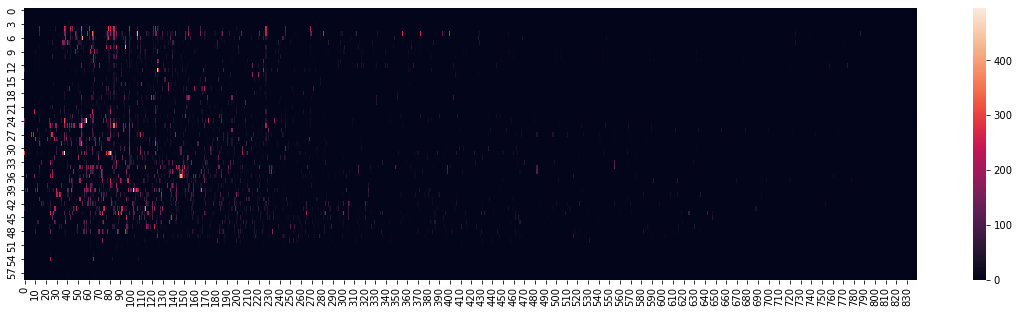

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,5))
ax.set_facecolor('grey')
#ax.heatmap(x_positions,y_positions,s=3,c=colors,cmap='gist_stern',facecolor='grey')
sns.heatmap(precursor_rt_histogram[0])#[:,0:300])
plt.show()

